* Opencv >= 3
* numpy
* scikit-image
* matplotlib

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

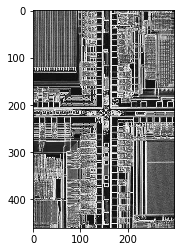

In [24]:
micro_processor = cv2.imread("images/microporcessor.tif",0)

plt.imshow(micro_processor,cmap="gray")
plt.show()

In [25]:
# ddepth = cv2.CV_8U
ddepth = cv2.CV_64F

BW_x = cv2.Sobel(micro_processor, ddepth, 0, 1,ksize=5)
BW_y = cv2.Sobel(micro_processor, ddepth, 1, 0,ksize=5)

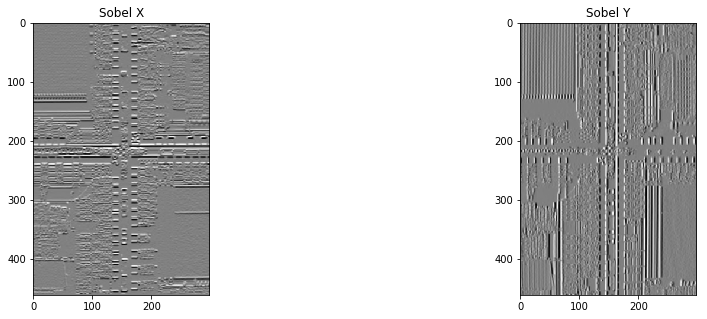

In [26]:
f, subplt = plt.subplots(1,2,figsize=(16,5))
subplt[0].imshow(BW_x,cmap='gray')
subplt[0].set_title("Sobel X")
subplt[1].imshow(BW_y,cmap='gray')
subplt[1].set_title("Sobel Y")
plt.show()

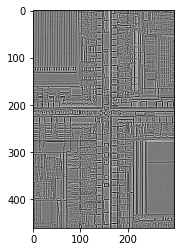

In [27]:
# ddepth = cv2.CV_8U
ddepth = cv2.CV_64F
Laplac = cv2.Laplacian(micro_processor, ddepth,ksize=5)
plt.imshow(Laplac, cmap="gray")
plt.show()

In [28]:
barbara = cv2.imread("images/barbara.tif",0)
W = np.array([[0,-1,0],[-1, 5, -1],[0, -1, 0]])
W

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

In [29]:
gd = cv2.filter2D(barbara,-1,W)

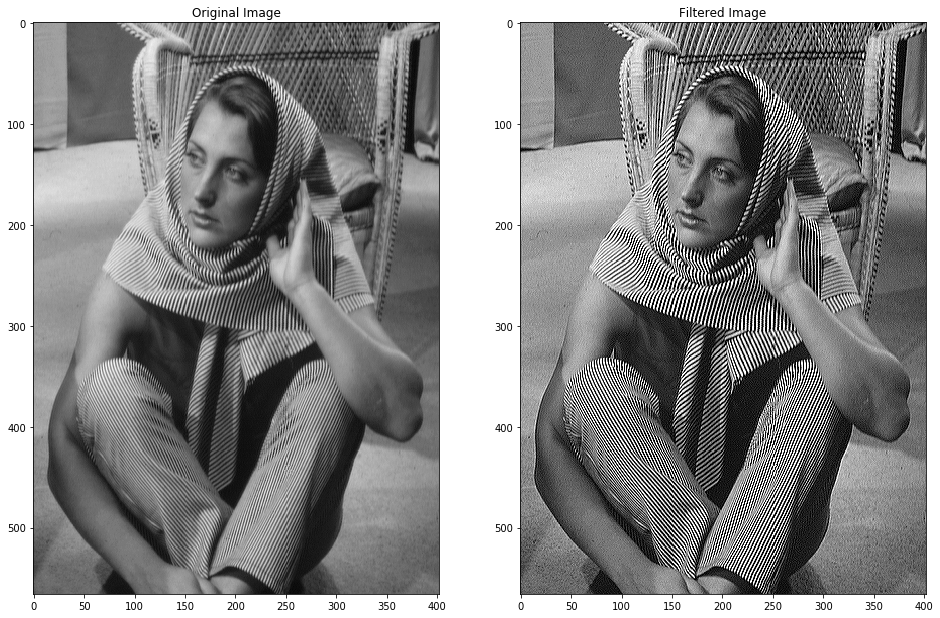

In [31]:
f, subplt = plt.subplots(1,2,figsize=(16,12))
subplt[0].imshow(barbara,cmap='gray')
subplt[0].set_title("Original Image")
subplt[1].imshow(gd,cmap='gray')
subplt[1].set_title("Filtered Image")
plt.show()

In [56]:
lena = cv2.imread("images/lena.tif",0)
W = np.array([[0,1,0],[1, -4, 1],[0, 1, 0]])
W

array([[ 0,  1,  0],
       [ 1, -4,  1],
       [ 0,  1,  0]])

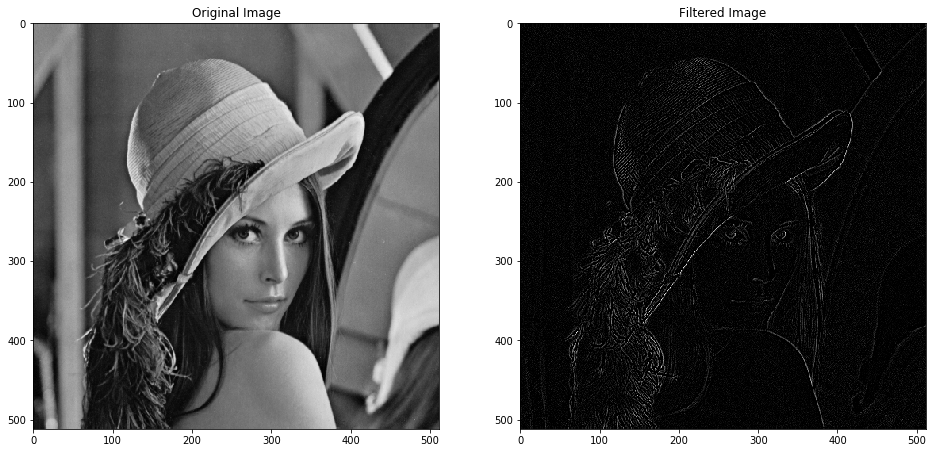

In [57]:
ddepth = cv2.CV_8U
border = cv2.BORDER_REPLICATE
gd = cv2.filter2D(lena,ddepth,W,borderType=border)

f, subplt = plt.subplots(1,2,figsize=(16,12))
subplt[0].imshow(lena,cmap='gray')
subplt[0].set_title("Original Image")
subplt[1].imshow(gd,cmap='gray')
subplt[1].set_title("Filtered Image")
plt.show()

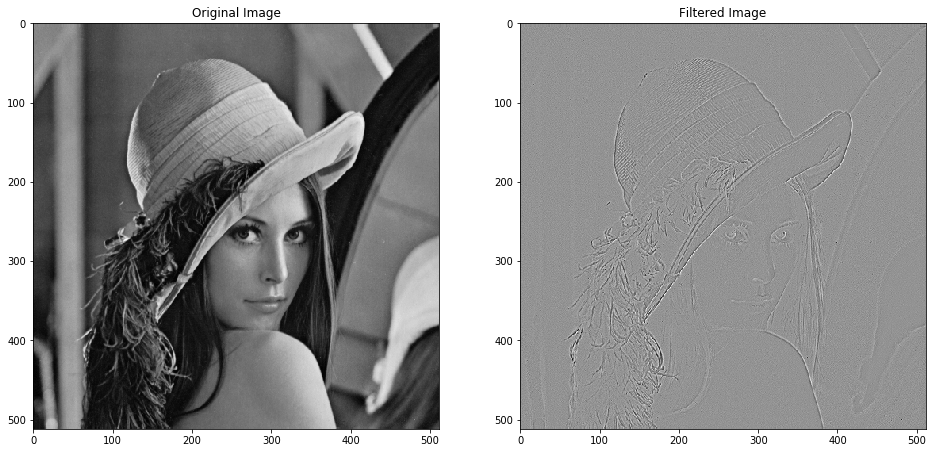

In [58]:
ddepth = cv2.CV_64F
border = cv2.BORDER_REPLICATE
gd = cv2.filter2D(lena,ddepth,W,borderType=border)

f, subplt = plt.subplots(1,2,figsize=(16,12))
subplt[0].imshow(lena,cmap='gray')
subplt[0].set_title("Original Image")
subplt[1].imshow(gd,cmap='gray')
subplt[1].set_title("Filtered Image")
plt.show()

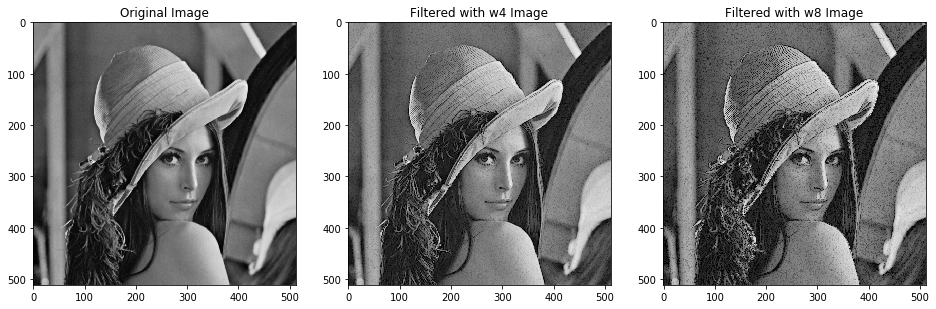

In [67]:
ddepth = cv2.CV_8U
border = cv2.BORDER_REPLICATE

# lena = img_as_float(lena)

W4 = np.array([[0,1,0],[1, -4, 1],[0, 1, 0]])
g4 = cv2.absdiff(lena , cv2.filter2D(lena,ddepth,W4,borderType=border))

W8 = np.array([[1,1,1],[1, -8, 1],[1, 1, 1]])
g8 = cv2.absdiff(lena , cv2.filter2D(lena,ddepth,W8,borderType=border))


f, subplt = plt.subplots(1,3,figsize=(16,12))
subplt[0].imshow(lena,cmap='gray')
subplt[0].set_title("Original Image")
subplt[1].imshow(g4,cmap='gray')
subplt[1].set_title("Filtered with w4 Image")
subplt[2].imshow(g8,cmap='gray')
subplt[2].set_title("Filtered with w8 Image")
plt.show()

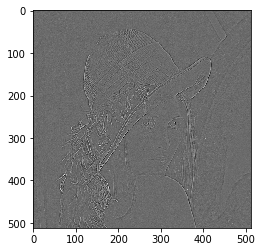

In [88]:
from skimage import data, img_as_float
lena = cv2.imread("images/lena.tif",0)
lena = img_as_float(lena)
lena_avg3 = cv2.GaussianBlur(lena, ksize=(5,5),sigmaX=0.3)
lena_avg5 = cv2.GaussianBlur(lena, ksize=(5,5),sigmaX=0.5)
I = lena_avg3 - lena_avg5

plt.imshow(I,cmap="gray")
plt.show()

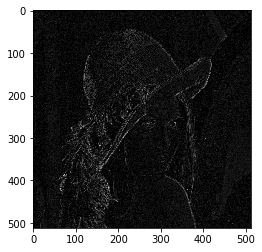

In [89]:
lena = cv2.imread("images/lena.tif",0)
lena_avg3 = cv2.GaussianBlur(lena, ksize=(5,5),sigmaX=0.3)
lena_avg5 = cv2.GaussianBlur(lena, ksize=(5,5),sigmaX=0.5)
I = cv2.absdiff(lena_avg3 , lena_avg5)

plt.imshow(I,cmap="gray")
plt.show()

In [106]:
def edge_log(img,sigma):
    blur = cv2.GaussianBlur(img,(3,3),sigma)
    laplacian = cv2.Laplacian(blur,cv2.CV_64F)
    return laplacian/laplacian.max()

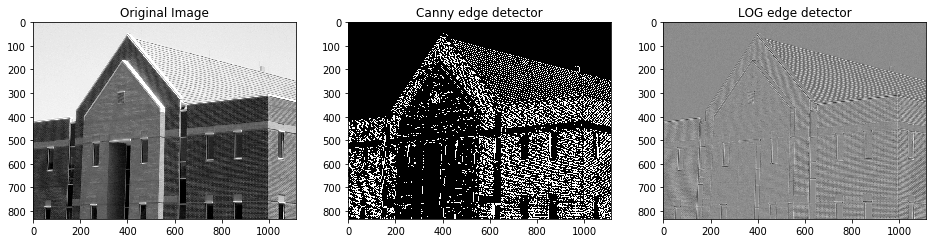

In [107]:
building = cv2.imread("images/building.tif", 0)

canny = cv2.Canny(building,50,100)
log = edge_log(building,0)

f, subplt = plt.subplots(1,3,figsize=(16,12))
subplt[0].imshow(building,cmap='gray')
subplt[0].set_title("Original Image")
subplt[1].imshow(canny,cmap='gray')
subplt[1].set_title("Canny edge detector")
subplt[2].imshow(log,cmap='gray')
subplt[2].set_title("LOG edge detector")
plt.show()